<a href="https://colab.research.google.com/github/orlandxrf/escuela-verano/blob/main/4_1_Escuela_Verano_Clasificacion_Textos_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img src="https://raw.githubusercontent.com/orlandxrf/escuela-verano/main/img/logos.png" height="100" />

<h1>Escuela de verano del Laboratorio de Estructuras y Dinámicas Sociales</h1>
Escuela de Verano, 25-28 de Junio de 2024
<hr>
<h2><strong>Descubre el poder del PLN: aprende a pre-procesar, analizar y extraer información de textos<strong></h2>
<hr>

# Clasificación de textos

La clasificación de textos, también conocida como categorización de textos, es una tarea fundamental en el ámbito del PLN que consiste en asignar automáticamente una o varias etiquetas de categoría predefinidas a un documento de texto o fragmento de texto.

En otras palabras, el objetivo es entrenar un modelo de aprendizaje automático para que pueda analizar el contenido y el significado de un texto y, en base a ello, determinar a cuál de las categorías establecidas pertenece.

## Asignación de categorías

Las categorías pueden ser de diversa índole, dependiendo del contexto y la aplicación específica. Algunos ejemplos comunes incluyen:

* **Clasificación de correos electrónicos**: spam, no spam, promocional, personal, etc.

* **Clasificación de artículos de noticias**: política, economía, deportes, tecnología, etc.

* **Clasificación de opiniones de clientes**: positiva, negativa, neutral.

* **Clasificación de documentos médicos**: diagnóstico, tratamiento, pronóstico, etc.

## Aplicaciones

La clasificación de textos tiene un amplio abanico de aplicaciones prácticas en diversos sectores, como:

* **Filtrado de spam**: identificar y eliminar correos electrónicos no deseados.

* **Organización de documentos**: clasificar automáticamente documentos digitales en carpetas relevantes.

* **Análisis de sentimiento**: determinar la opinión general expresada en un texto.

* **Soporte al cliente**: clasificar las solicitudes de asistencia y dirigirlas al departamento o agente adecuado.

* **Moderación de contenido**: identificar y eliminar contenido inapropiado en foros, redes sociales, etc.

## Algoritmos

La tarea de clasificación de textos se lleva a cabo típicamente mediante algoritmos de aprendizaje automático supervisado, los cuales se entrenan con un conjunto de datos de ejemplos de texto previamente etiquetados con las categorías correspondientes.

El modelo aprende a identificar patrones y características en los textos que son discriminativos entre las diferentes categorías, y posteriormente utiliza este conocimiento para clasificar nuevos textos sin etiquetar.

Existen diversos algoritmos de aprendizaje automático que pueden emplearse para la clasificación de textos, entre los más comunes encontramos:

* **Naïve Bayes**: un algoritmo probabilístico basado en el teorema de Bayes.

* **K-Nearest Neighbors (KNN)**: clasifica un nuevo texto en función de la categoría de los ejemplos más similares en el conjunto de entrenamiento.

* **Máquinas de soporte vectorial (SVM)**: busca un hiperplano que separa de manera óptima las diferentes clases de puntos en el espacio de características.

* **Redes neuronales artificiales**: modelos computacionales inspirados en el funcionamiento del cerebro humano, capaces de aprender patrones complejos a partir de datos.

## Obtener conjunto de datos

In [1]:
# descargar los archivos utilizando "wget"
!wget -P data/ https://raw.githubusercontent.com/orlandxrf/escuela-verano/main/data/ia_tweets.csv

--2024-06-26 15:42:15--  https://raw.githubusercontent.com/orlandxrf/escuela-verano/main/data/ia_tweets.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 918376 (897K) [text/plain]
Saving to: ‘data/ia_tweets.csv’

ia_tweets.csv       100%[===================>] 896.85K  --.-KB/s    in 0.03s   

2024-06-26 15:42:16 (26.1 MB/s) - ‘data/ia_tweets.csv’ saved [918376/918376]



## Bibilotecas requeridas

Una de las bibbliotecas ampliamente usadas es [scikit-learn](https://scikit-learn.org/stable/). Contiene una gran variedad de algorimos programados y listos para ser usados, además de presentar ejemplos.

In [2]:
# instalar scikit-learn
# !pip install scikit-learn
# decargar el modelo en idioma español
!python -m spacy download es_core_news_sm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.9/12.9 MB 15.6 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('es_core_news_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [3]:
from spacy.lang.es.stop_words import STOP_WORDS

## Preprocesamiento

En el procesamiento se aplica lo siguiente:

1. Limpiar tweets
2. Normalizar tweets
  * Convertir a minúsculas el tweet
  * Elimina las palabras vacías
3. Tokenizar
4. Extracción de caracteristicas (features)



In [4]:
# definir una función para preprocesar cada tweet
import re

def preprocesamiento_de_tweet(tweet):
    # Eliminar URLs
    tweet = re.sub(r'http\S+|www\S+|https\S+', '', tweet, flags=re.MULTILINE)

    # Eliminar menciones (@usuario)
    tweet = re.sub(r'@\w+', '', tweet)

    # Eliminar hashtags (#hashtag)
    tweet = re.sub(r'#\w+', '', tweet)

    # Eliminar caracteres especiales y puntuación
    tweet = re.sub(r'[^\w\s]', '', tweet)

    # Eliminar números
    tweet = re.sub(r'\d+', '', tweet)

    # Eliminar espacios adicionales
    tweet = re.sub(r'\s+', ' ', tweet).strip()

    # Normalizar los tweets convirtiendo a minúsculas
    tweet = tweet.lower()

    # dividir el tweet en tokens
    words = tweet.split()

    # eliminar las stopwords
    tweet = ' '.join([word for word in words if word not in STOP_WORDS])

    return tweet

## Entrenar modelo

En esta clasificación de textos, se utiliza las Máquinas de Soporte Vectorial (SVM).

### Características

La definición de características (features) se refiere al proceso de extraer y transformar información relevante de un documento de texto para representarlo como un conjunto de vectores numéricos.

Estos vectores, denominados vectores de características, sirven como entrada para el algoritmo SVM, el cual los utiliza para aprender a discriminar entre las diferentes categorías de texto.

### Extracción de características:

* **Bolsa de palabras**: Representar cada documento como un vector que contiene la frecuencia de aparición de cada palabra única en el corpus.

* **N-gramas**: Representar cada documento como un vector que contiene la frecuencia de aparición de secuencias de n palabras contiguas (por ejemplo, bigramas, trigramas).

* **TF-IDF**: Ponderar la importancia de cada palabra en un documento en función de su frecuencia en el documento y su rareza en el corpus.

* **Características basadas en la posición**: Considerar la posición de las palabras en el texto para capturar información contextual.

### Leer conjunto de datos

In [22]:
import pandas as pd

df = pd.read_csv("data/ia_tweets.csv")

# aplicar la función a cada renglón del DataFrame
tweets_df = pd.DataFrame(df["text"].apply(preprocesamiento_de_tweet))

print(f"Cantidad de tweets: {len(tweets_df):,}")

# eliminar renglones vacíos despues de la limpieza
tweets_df = tweets_df[tweets_df["text"] != ""]

print(f"Cantidad de tweets sin renglones vacíos: {len(tweets_df):,}")

# agregar la columna 'polarity' del DataFrame original al DataFrame tweets_df
tweets_df["polarity"] = df["polarity"]

# mostrar el DataFrame
# tweets_df

Cantidad de tweets: 4,038
Cantidad de tweets sin renglones vacíos: 3,897


### Visualizar distribución de las clases

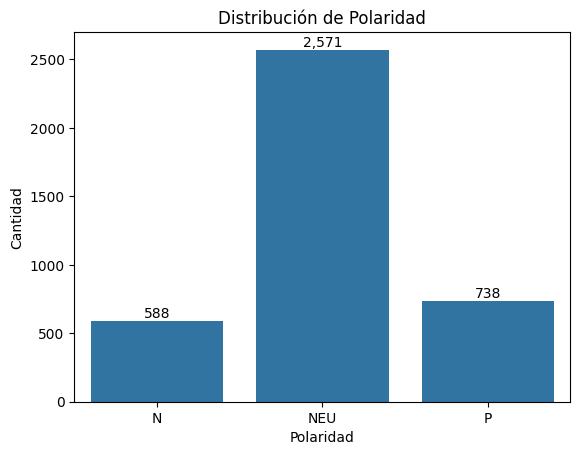

In [23]:
# graficar la distribucion de valores de la columna "polarity"
import seaborn as sns
import matplotlib.pyplot as plt

def graficar_distribucion_polaridad(df):
  sns.countplot(x="polarity", data=tweets_df)
  for p in plt.gca().patches:
      plt.gca().annotate(f'{p.get_height():,.0f}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='bottom')

  plt.title("Distribución de Polaridad")
  plt.xlabel("Polaridad")
  plt.ylabel("Cantidad")

  plt.show()


# graficar la distribución
graficar_distribucion_polaridad(tweets_df)

### Entrenamiento

In [24]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report
import re

# Extraer características usando TF-IDF
vectorizer = TfidfVectorizer(max_features=1000)
X = vectorizer.fit_transform(tweets_df['text']).toarray()
y = tweets_df['polarity']

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Entrenar el modelo SVM
model_tres = SVC(kernel='linear')
model_tres.fit(X_train, y_train)

# Evaluar el modelo
y_pred = model_tres.predict(X_test)
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           N       0.54      0.13      0.22       104
         NEU       0.71      0.94      0.81       528
           P       0.57      0.22      0.32       148

    accuracy                           0.69       780
   macro avg       0.61      0.43      0.45       780
weighted avg       0.66      0.69      0.64       780



#### Métricas

Las métricas para la clasificación de textos: **Precision**, **Recall** y **F1-score**.

Imaginemos que un detective está buscando criminales en una ciudad. Para evaluar su desempeño, se utilizan tres métricas:

1. **Precision**: Porcentaje de sospechosos que resultaron ser realmente criminales tras ser arrestados.

  Un detective con alta precisión atrapa pocos inocentes, pero todos sus arrestos son acertados.

2. **Recall**: Porcentaje de criminales que fueron identificados y arrestados por el detective.

  Un detective con alto recall atrapa a muchos criminales, pero algunos inocentes podrían ser arrestados por error.

3. **F1-score**: Medida que combina la precisión y el recall en un solo valor, proporcionando una visión general del desempeño del detective.

Un **F1-score** alto indica un buen equilibrio entre **precision** y **recall**.

En la clasificación de textos, estas métricas funcionan de manera similar:

* **Precision**: Porcentaje de textos clasificados correctamente en una categoría específica.

* **Recall**: Porcentaje de textos que pertenecen a una categoría específica y que fueron clasificados correctamente en dicha categoría.

* **F1-score**: Medida que combina la precisión y el recall para la clasificación de una categoría específica.

##### Ejemplo:

Imaginemos un sistema que clasifica correos electrónicos como **spam** o no **spam**.

* **Precision para spam**: Porcentaje de correos electrónicos marcados como spam que realmente son spam.

* **Recall para spam**: Porcentaje de correos electrónicos que son spam y que fueron marcados correctamente como spam.

* **F1-score para spam**: Medida que combina la precisión y el recall para la clasificación de spam.

**Interpretación**:

* **Alta precision**: El sistema clasifica la mayoría de los correos electrónicos como spam correctamente, pero algunos correos electrónicos no spam podrían ser marcados como spam por error.

* **Alto recall**: El sistema identifica la mayoría de los correos electrónicos que son spam, pero algunos correos electrónicos no spam podrían ser marcados como spam por error.

* **Alto F1-score**: El sistema tiene un buen equilibrio entre precisión y recall para la clasificación de spam.

En general, un modelo de clasificación de texto con métricas de **precision**, **recall** y **F1-score** altas se considera un modelo de buen rendimiento.

Es importante considerar las tres métricas juntas, ya que ninguna de ellas proporciona una imagen completa por sí sola.

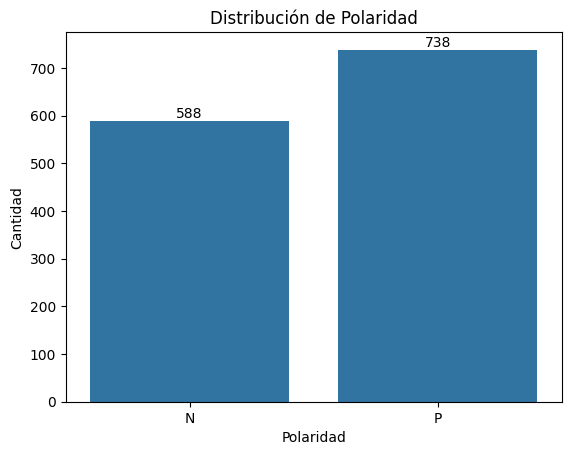

In [25]:
# eliminar todos los renglones donde la "polaridad" es igual a "NEU"
tweets_df = tweets_df[tweets_df["polarity"] != "NEU"]

# graficar la distribución
graficar_distribucion_polaridad(tweets_df)

In [26]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report
import re

# Extraer características usando TF-IDF
vectorizer = TfidfVectorizer(max_features=1000)
X = vectorizer.fit_transform(tweets_df['text']).toarray()
y = tweets_df['polarity']

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Entrenar el modelo SVM
model_dos = SVC(kernel='linear')
model_dos.fit(X_train, y_train)

# Evaluar el modelo
y_pred = model_dos.predict(X_test)
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           N       0.69      0.76      0.72       119
           P       0.79      0.73      0.76       147

    accuracy                           0.74       266
   macro avg       0.74      0.74      0.74       266
weighted avg       0.74      0.74      0.74       266



## Predicción

In [27]:
# Nuevos tweets para predecir
new_tweets = [
    'La IA es una amenaza para la humanidad.',
    'El uso de la inteligencia artificial ahorra tiempo en la investigación.',
    'Hoy en día tu trabajo sera reemplazado por una inteligencia artificial.',
]

# Preprocesar los nuevos tweets
new_tweets_processed = [preprocesamiento_de_tweet(tweet) for tweet in new_tweets]

# Transformar los nuevos tweets usando el vectorizador TF-IDF entrenado
X_new = vectorizer.transform(new_tweets_processed).toarray()

# Predecir las etiquetas de los nuevos tweets con tres polaridades (N, NEU, P)
y_new_pred = model_tres.predict(X_new)

# Imprimir las predicciones
for tweet, label in zip(new_tweets, y_new_pred):
    print(f'Tweet: "{tweet}" -> Predicción: {label}')


Tweet: "La IA es una amenaza para la humanidad." -> Predicción: NEU
Tweet: "El uso de la inteligencia artificial ahorra tiempo en la investigación." -> Predicción: NEU
Tweet: "Hoy en día tu trabajo sera reemplazado por una inteligencia artificial." -> Predicción: NEU


In [28]:
# Predecir las etiquetas de los nuevos tweets con tres polaridades (N, P)
y_new_pred = model_dos.predict(X_new)

# Imprimir las predicciones
for tweet, label in zip(new_tweets, y_new_pred):
    print(f'Tweet: "{tweet}" -> Predicción: {label}')


Tweet: "La IA es una amenaza para la humanidad." -> Predicción: N
Tweet: "El uso de la inteligencia artificial ahorra tiempo en la investigación." -> Predicción: P
Tweet: "Hoy en día tu trabajo sera reemplazado por una inteligencia artificial." -> Predicción: P
